In [11]:
import piplite
await piplite.install('seaborn')
await piplite.install('xlrd')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
#ls

In [134]:
cust = pd.read_csv('customers_sample.csv',sep=',',low_memory=False)
header_trans = ["uid1","date_pur","mcc_id","transaction_amt","transaction_qty"]
trans = pd.read_csv('transactional_data.csv', names=header_trans)
codes = pd.read_excel('merchant codes list.xls')

In [135]:
cust.head()

,uid1,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push
0,8388,46.0,RUSSIA,Kazan,18/02/17,01/05/19,0,0,1,0
1,17264,20.0,RUSSIA,Sevastopol,21/07/20,03/10/21,0,0,1,0
2,17373,31.0,RUSSIA,Kazan,26/02/16,24/12/18,0,1,1,0
3,26297,27.0,RUSSIA,Sevastopol,25/01/18,16/04/18,0,1,1,1
4,27044,41.0,RUSSIA,Sevastopol,17/07/15,30/07/16,0,0,0,0


In [136]:
trans.head()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty
0,1,NaN,NaN,NaN,NaN
1,18754051,17/06/20,5533.0,1200.0,1.0
2,47705198,2/4/2021,4111.0,72.0,0.0
3,33466679,1/4/2021,5814.0,240.0,2.0
4,41444652,10/11/2020,4131.0,60.0,2.0


In [137]:
codes.head()

,STANDARD MERCHANT CATEGORY CODES\n**Please do not sort this spreadsheet**,Unnamed: 1,Unnamed: 2
0,MCC CODE,Program Type:,NaN
1,0742,Veterinary Services,NaN
2,0763,Agricultural Cooperatives,NaN
3,0780,Landscaping and Horticultural Services,NaN
4,1520,General Contractor/Residential Building,NaN


In [138]:
cust.isna().sum()

uid1                         0
customer_age                11
country                      0
city_of_living               0
registration_dt             89
website_last_visit_date    225
email                        0
has_mob_app                  0
phone_number                 0
push                         0
dtype: int64

In [139]:
cust.shape

(10000, 10)

In [140]:
trans.isna().sum()

uid1               0
date_pur           1
mcc_id             1
transaction_amt    1
transaction_qty    1
dtype: int64

In [141]:
codes.isna().sum()

STANDARD MERCHANT CATEGORY CODES\n**Please do not sort this spreadsheet**      1
Unnamed: 1                                                                     0
Unnamed: 2                                                                   867
dtype: int64

In [142]:
codes.shape

(882, 3)

In [143]:
codes = codes.rename(columns={'STANDARD MERCHANT CATEGORY CODES\n**Please do not sort this spreadsheet**':'mcc_id',
                             'Unnamed: 1':'program_type'})

In [144]:
codes = codes.iloc[1:,:]

In [145]:
codes = codes.iloc[:,0:2]

In [146]:
codes = codes.reset_index(drop=True)

In [147]:
codes.head()

,mcc_id,program_type
0,0742,Veterinary Services
1,0763,Agricultural Cooperatives
2,0780,Landscaping and Horticultural Services
3,1520,General Contractor/Residential Building
4,1711,"Heating, Plumbing, Air Conditioning Contractors"


In [148]:
trans.head()    

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty
0,1,NaN,NaN,NaN,NaN
1,18754051,17/06/20,5533.0,1200.0,1.0
2,47705198,2/4/2021,4111.0,72.0,0.0
3,33466679,1/4/2021,5814.0,240.0,2.0
4,41444652,10/11/2020,4131.0,60.0,2.0


In [149]:
display(trans)

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty
0,1,NaN,NaN,NaN,NaN
1,18754051,17/06/20,5533.0,1200.00,1.0
2,47705198,2/4/2021,4111.0,72.00,0.0
3,33466679,1/4/2021,5814.0,240.00,2.0
4,41444652,10/11/2020,4131.0,60.00,2.0
...,...,...,...,...,...
32533,9142420,8/10/2021,5499.0,404.00,5.0
32534,17862308,14/05/20,5411.0,1761.67,1.0
32535,38256425,13/03/20,5993.0,189.00,1.0
32536,25631926,27/08/20,5499.0,82.00,2.0


In [150]:
data = pd.merge(trans,codes,on=('mcc_id'),how='left')

In [151]:
data.head()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty,program_type
0,1,NaN,NaN,NaN,NaN,Visa - Non-Financial Institutions - Foreign Cu...
1,18754051,17/06/20,5533.0,1200.0,1.0,Automotive Parts and Accessories Stores
2,47705198,2/4/2021,4111.0,72.0,0.0,Local and Suburban Commuter Passenger Transpor...
3,33466679,1/4/2021,5814.0,240.0,2.0,Quick Payment Service-Fast Food Restaurants
4,41444652,10/11/2020,4131.0,60.0,2.0,"Bus Lines, includes Charters/Tour Buses"


In [152]:
data.isna().sum()

uid1                0
date_pur            1
mcc_id              1
transaction_amt     1
transaction_qty     1
program_type       31
dtype: int64

In [153]:
cust = cust.dropna()

In [154]:
cust.shape

(9675, 10)

In [155]:
list(cust.columns)

['uid1',
 'customer_age',
 'country',
 'city_of_living',
 'registration_dt',
 'website_last_visit_date',
 'email',
 'has_mob_app',
 'phone_number',
 'push']

In [165]:
sns.countplot(x=cust['has_mob_app'])

<AxesSubplot:xlabel='has_mob_app', ylabel='count'>

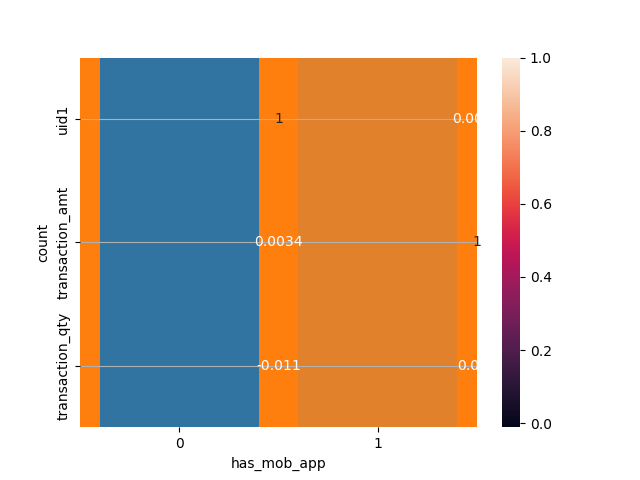

In [166]:
plt.show()

In [167]:
sns.countplot(x=cust['phone_number'])

<AxesSubplot:xlabel='phone_number', ylabel='count'>

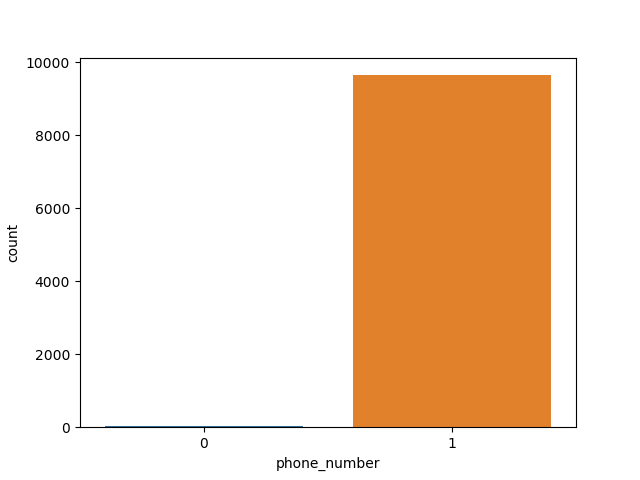

In [168]:
plt.show()

In [169]:
sns.countplot(x=cust.country)

<AxesSubplot:xlabel='country', ylabel='count'>

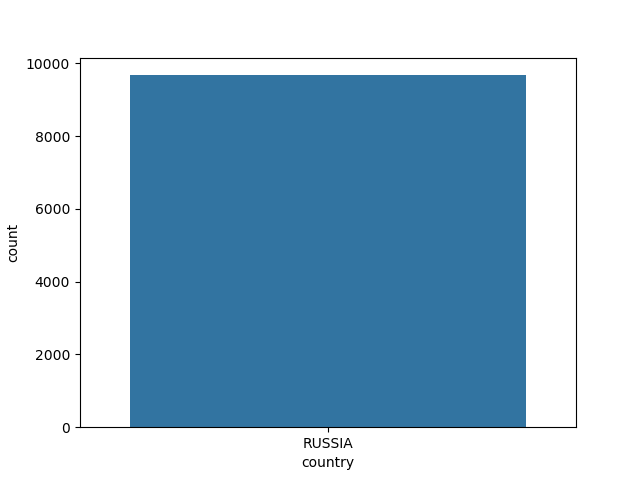

In [170]:
plt.show()

In [159]:
trans_per_program = data.groupby('program_type')['transaction_amt'].sum()

In [171]:
trans_per_program.head()

program_type
Advertising Services                                           60197.74
AeroFlot                                                       90105.00
Airlines and Air Carriers                                     343376.73
Airports, Flying Fields, and Airport Terminals                   600.00
Amusement Parks, Circuses, Carnivals, and Fortune Tellers      14380.00
Name: transaction_amt, dtype: float64

In [172]:
cust.isna().sum()

uid1                       0
customer_age               0
country                    0
city_of_living             0
registration_dt            0
website_last_visit_date    0
email                      0
has_mob_app                0
phone_number               0
push                       0
dtype: int64

In [173]:
data2 = pd.merge(data,cust,on='uid1',how='left')

In [174]:
data2.head(50)

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty,program_type,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push
0,1,NaN,NaN,NaN,NaN,Visa - Non-Financial Institutions - Foreign Cu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18754051,17/06/20,5533.0,1200.00,1.0,Automotive Parts and Accessories Stores,51.0,RUSSIA,Novokuznetsk,27/06/17,20/05/19,0.0,0.0,1.0,0.0
2,47705198,2/4/2021,4111.0,72.00,0.0,Local and Suburban Commuter Passenger Transpor...,33.0,RUSSIA,Moscow,11/01/17,09/11/18,0.0,0.0,1.0,0.0
3,33466679,1/4/2021,5814.0,240.00,2.0,Quick Payment Service-Fast Food Restaurants,31.0,RUSSIA,Voronezh,12/04/13,24/10/16,1.0,0.0,1.0,0.0
4,41444652,10/11/2020,4131.0,60.00,2.0,"Bus Lines, includes Charters/Tour Buses",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20756572,11/8/2020,5311.0,150.00,1.0,Department Stores,57.0,RUSSIA,Volgograd,19/11/15,03/01/21,0.0,0.0,1.0,0.0
6,19982774,4/9/2020,5499.0,379.00,1.0,Miscellaneous Food Stores-Convenience Stores a...,30.0,RUSSIA,Vladivostok,19/05/17,21/04/18,0.0,1.0,1.0,1.0
7,49405397,9/7/2021,5691.0,619.00,1.0,Men's and Women's Clothing Stores,24.0,RUSSIA,Volgograd,05/11/15,10/10/19,0.0,0.0,1.0,0.0
8,450512,2/1/2021,5816.0,-150.00,-1.0,Digital Goods – Games,29.0,RUSSIA,Vladivostok,01/02/16,07/10/17,1.0,1.0,1.0,1.0
9,37469591,15/08/21,5814.0,1201.00,3.0,Quick Payment Service-Fast Food Restaurants,28.0,RUSSIA,Odintsovo,22/02/17,29/09/18,0.0,1.0,1.0,0.0


In [175]:
sns.heatmap(data.corr(method='pearson'),annot=True)

<AxesSubplot:>

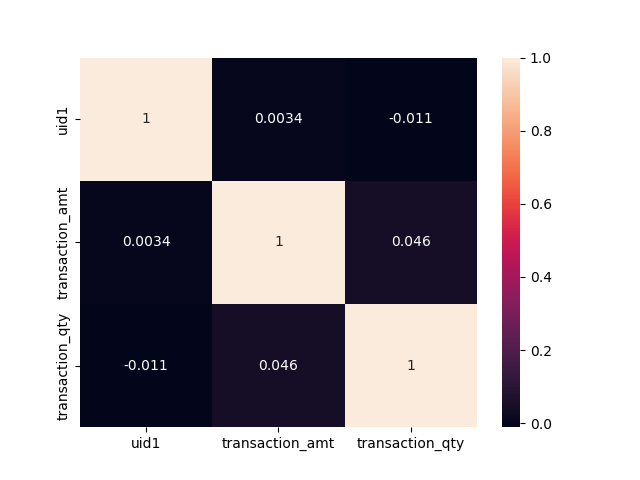

In [176]:
plt.show()

In [178]:

from sklearn.cluster import KMeans
await piplite.install('plotly')
import plotly.graph_objects as go

In [179]:
from sklearn.preprocessing import LabelEncoder

In [180]:
le = LabelEncoder()

In [181]:
data2['program_type'] = le.fit_transform(data2['program_type'])

In [182]:
data2['city_of_living'] = le.fit_transform(data2['city_of_living'])

In [183]:
data2.isna().sum()

uid1                         0
date_pur                     1
mcc_id                       1
transaction_amt              1
transaction_qty              1
program_type                 0
customer_age               905
country                    905
city_of_living               0
registration_dt            905
website_last_visit_date    905
email                      905
has_mob_app                905
phone_number               905
push                       905
dtype: int64

In [184]:
data2.shape

(32538, 15)

In [185]:
data2 = data2.dropna()

In [186]:
X = data2[['transaction_amt','customer_age','city_of_living','has_mob_app']]

In [187]:
# Implemeting Elbow Method to Determine Optimal Clusters

Sum_of_squared_distances = []
clus_range = range(1,12)
for k in clus_range:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(clus_range, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k') #Showing 3 as optimal Clusters

Text(0.5, 1.0, 'Elbow Method For Optimal k')

In [189]:

kmean = KMeans(n_clusters =2,init='k-means++',random_state=2,algorithm='full')

kmean.fit(X)

clus=  kmean.predict(X)

/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1316: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [190]:
#Showing Centroids

cent = kmean.cluster_centers_


print(cent)

[[7.81414539e+02 3.97905286e+01 9.92039707e+00 3.51289833e-01]
 [1.50000000e+06 5.20000000e+01 4.00000000e+00 1.00000000e+00]]


In [191]:
sns.countplot(x=clus)

<AxesSubplot:title={'center':'Elbow Method For Optimal k'}, xlabel='k', ylabel='count'>

In [192]:
data2.columns

Index(['uid1', 'date_pur', 'mcc_id', 'transaction_amt', 'transaction_qty',
       'program_type', 'customer_age', 'country', 'city_of_living',
       'registration_dt', 'website_last_visit_date', 'email', 'has_mob_app',
       'phone_number', 'push'],
      dtype='object')

In [193]:
data['transaction_amt'].hist()

<AxesSubplot:title={'center':'Elbow Method For Optimal k'}, xlabel='k', ylabel='count'>

In [194]:
data['transaction_qty'].hist()

<AxesSubplot:title={'center':'Elbow Method For Optimal k'}, xlabel='k', ylabel='count'>

In [195]:
data2['customer_age'].hist()

<AxesSubplot:title={'center':'Elbow Method For Optimal k'}, xlabel='k', ylabel='count'>

In [196]:
data2['city_of_living'] = le.inverse_transform(data2['city_of_living'])

In [197]:
moscow = data2.loc[data2['city_of_living']=='Moscow']

In [198]:
moscow

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty,program_type,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push
2,47705198,2/4/2021,4111.0,72.00,0.0,111,33.0,RUSSIA,Moscow,11/01/17,09/11/18,0.0,0.0,1.0,0.0
10,20271100,9/11/2020,5814.0,217.50,1.0,160,25.0,RUSSIA,Moscow,10/07/17,06/09/20,0.0,1.0,1.0,1.0
19,14855276,10/3/2020,4121.0,104.00,2.0,179,39.0,RUSSIA,Moscow,14/11/12,30/06/19,1.0,1.0,1.0,1.0
32,6246037,19/03/20,4111.0,41.00,1.0,111,43.0,RUSSIA,Moscow,04/08/14,31/01/21,1.0,1.0,1.0,0.0
48,19360036,12/5/2020,5411.0,263.77,2.0,98,46.0,RUSSIA,Moscow,24/04/19,17/10/20,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32509,31909673,18/07/21,5977.0,171.90,1.0,51,17.0,RUSSIA,Moscow,30/03/21,30/08/21,0.0,0.0,1.0,0.0
32511,19511718,2/3/2020,5411.0,590.00,1.0,98,68.0,RUSSIA,Moscow,04/02/16,21/12/17,1.0,1.0,1.0,0.0
32512,13062850,24/06/21,4121.0,187.00,1.0,179,35.0,RUSSIA,Moscow,10/12/13,17/02/21,0.0,0.0,1.0,0.0
32520,49520526,31/08/21,4131.0,42.00,1.0,20,42.0,RUSSIA,Moscow,16/02/13,09/02/18,0.0,0.0,1.0,0.0


In [199]:
len(data2['city_of_living'].unique())

21

In [200]:
unique_city = data2['city_of_living'].unique()

In [201]:
unique_city

array(['Novokuznetsk', 'Moscow', 'Voronezh', 'Volgograd', 'Vladivostok',
       'Odintsovo', 'Saint-Petersburg', 'Obninsk', 'Krasnodar', 'Kazan',
       'Krasnogorsk', 'Sevastopol', 'Perm', 'Pushkin', 'Samara',
       'Ekaterinburg', 'Novosibirsk', 'Kaliningrad', 'Omsk', 'Ufa',
       'Tomsk'], dtype=object)

In [202]:
saint_petersburg = data2.loc[data2['city_of_living']=='Saint-Petersburg']

In [203]:
perm = data2.loc[data2['city_of_living']=='Perm']

In [204]:
moscow['transaction_amt'].sum()

2925636.9299999997

In [205]:
moscow['transaction_amt'].mean()

769.0948817034699

In [206]:
saint_petersburg['transaction_amt'].sum()

783056.71

In [207]:
saint_petersburg['transaction_amt'].mean()

579.1839571005917

In [208]:
np.var(moscow['transaction_amt'])

9225163.021151064

In [209]:
np.var(saint_petersburg['transaction_amt'])

1764872.0576014272

## First Hypothesis Mean amount of transaction in Moscow is Higher than Saint Petersburg

In [210]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_ind(moscow['transaction_amt'],saint_petersburg['transaction_amt'],equal_var=False)
print("P Value:",result.pvalue)
if (result.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject null hypothesis")


P Value: 0.001890038832013092
We reject the null hypothesis


In [211]:
data2['customer_age'].hist(bins=10)

<AxesSubplot:title={'center':'Elbow Method For Optimal k'}, xlabel='k', ylabel='count'>

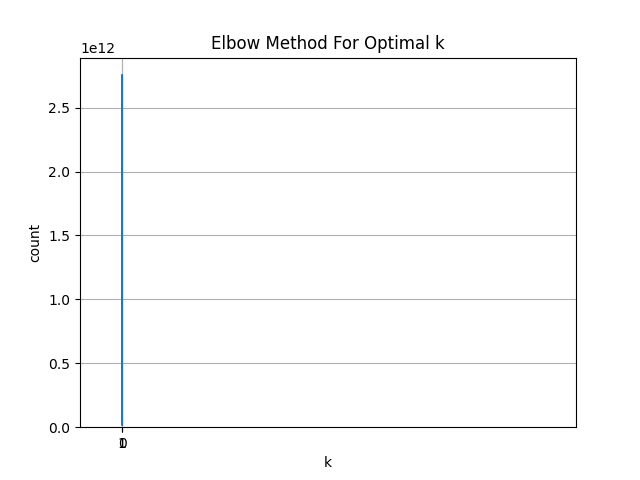

In [212]:
plt.show()

In [213]:
cust_30 = data2.loc[data2['customer_age']<=30]
cust50 = data2.loc[(data2['customer_age']>30) & (data2['customer_age']<=50)]

## Mean transaction amount of customers less than age 30 is less than mean transaction amount of customers between 30 to 50 age

In [214]:
cust_30['transaction_amt'].mean()

534.0059067965724

In [215]:
cust50['transaction_amt'].mean()

896.0395310236602

In [216]:
np.var(cust_30['transaction_amt'])

2978158.526520175

In [217]:
np.var(cust50['transaction_amt'])

22843527.25719879

In [218]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_ind(cust_30['transaction_amt'],cust50['transaction_amt'],equal_var=False)
print("P Value:",result.pvalue)
if (result.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject null hypothesis")

P Value: 3.2975662171092877e-18
We reject the null hypothesis


## mean transaction amount of customers who have mobile app is higher than mean transaction amount without mobile app

In [219]:
cust_app = data2.loc[data2['has_mob_app']==1.0]
cust_no_app = data2.loc[data2['has_mob_app']==0.0]

In [220]:
cust_app['transaction_amt'].mean()

906.6261288580941

In [221]:
cust_no_app['transaction_amt'].mean()

786.6651325536062

In [222]:
np.var(cust_app['transaction_amt'])

208824559.8703664

In [223]:
np.var(cust_no_app['transaction_amt'])

21108235.897231884

In [224]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_ind(cust_app['transaction_amt'],cust_no_app['transaction_amt'],equal_var=False)
print("P Value:",result.pvalue)
if (result.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject null hypothesis")

P Value: 0.3941946405196498
We cannot reject null hypothesis


In [225]:
data2['city_of_living'] = le.fit_transform(data2['city_of_living'])

In [226]:
data2.columns

Index(['uid1', 'date_pur', 'mcc_id', 'transaction_amt', 'transaction_qty',
       'program_type', 'customer_age', 'country', 'city_of_living',
       'registration_dt', 'website_last_visit_date', 'email', 'has_mob_app',
       'phone_number', 'push'],
      dtype='object')

In [227]:
X = data2[['transaction_amt','transaction_qty','program_type','customer_age','city_of_living','has_mob_app',
           'phone_number','push']]

In [228]:
len(X)

31633

In [229]:
from sklearn.model_selection import train_test_split

In [230]:
xtrain, xtrain = train_test_split(X,test_size=0.5,shuffle=True) ##Low computational Resources. 

In [231]:
#import scipy.cluster.hierarchy as sch

# graph size
#plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
#dendrogram = sch.dendrogram(sch.linkage(xtrain, method  = "ward"))

# ploting graphabs
#plt.title('Dendrogram')
#plt.xlabel('Customers')
#plt.ylabel('Euclidean distances')
#plt.show()

In [232]:
# ---from sklearn.cluster import AgglomerativeClustering
#from yellowbrick.cluster import KElbowVisualizer
#model = AgglomerativeClustering()

# k is range of number of clusters.
#visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
# Fit data to visualizer
#visualizer.fit(X)
# Finalize and render figure
#visualizer.show()---#

### Kernel was crashing to perform Agglomerative clustering due to less computational power. We need GPU machine and it was also not possible in Google COlab. However if we split datasets into multiple parts then it can work. It is for our future play with the data.

In [235]:
total=data2.assign(registration_dt = lambda x: pd.to_datetime(x.registration_dt), date_pur=lambda x: pd.to_datetime(x.date_pur))\
.iloc[:, [0, 9, 1]]

### Cohort Analysis

In [236]:
total=data2.assign(registration_dt = lambda x: pd.to_datetime(x.registration_dt), date_pur=lambda x: pd.to_datetime(x.date_pur))\
.iloc[:, [0, 9, 1]]

In [237]:
total.dtypes

uid1                        int64
registration_dt    datetime64[ns]
date_pur           datetime64[ns]
dtype: object

In [238]:
#I will choose clients for cohort analysis based on their transactions. 
#I am interested in first purchase after registration of each client
total1=total.groupby(['uid1', 'registration_dt'], as_index=False).agg({'date_pur':'min'})

In [239]:
#Check the days difference between purchase and registration
total1['diff']=total1.date_pur-total1.registration_dt

In [240]:
#These users made purchase at the same day after registration
cohorts0=total1.query('diff == "0 days"')
cohorts0

,uid1,registration_dt,date_pur,diff
431,3654631,2021-08-23,2021-08-23,0 days
1122,9035710,2020-01-24,2020-01-24,0 days
1865,14760352,2021-01-20,2021-01-20,0 days
3143,24411642,2021-07-30,2021-07-30,0 days
3623,28233665,2020-08-13,2020-08-13,0 days
3752,29116488,2021-06-16,2021-06-16,0 days
4469,34350075,2020-11-19,2020-11-19,0 days
5543,42102454,2021-05-18,2021-05-18,0 days
6620,50671227,2021-01-05,2021-01-05,0 days


In [241]:
#We are interested in year-month date as we group clients by months
cohorts0=cohorts0.assign(registration_dt = lambda x: x.registration_dt.dt.to_period('M'))

In [242]:
cohorts0_graph=cohorts0.groupby("registration_dt", as_index=False).agg({'uid1':'count'})

In [243]:
cohort_df = (cohorts0
             .groupby('registration_dt')[['uid1']]
             .nunique()
             .assign(total = lambda x: x.groupby('registration_dt').agg({'uid1':'count'}))).reset_index()

In [244]:
cohort_df.uid1.sum()

9

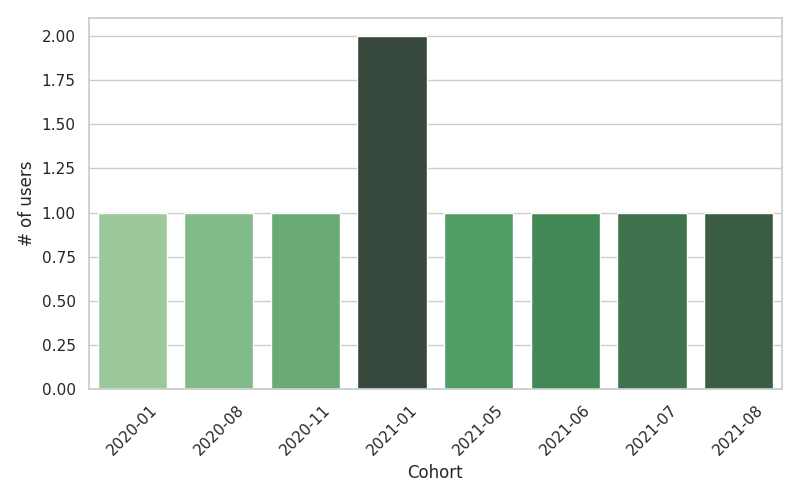

In [276]:
# THose clients who made purchase in the same day after registration

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_d", len(cohorts0_graph))
rank = cohorts0_graph.uid1.argsort().argsort()   
plt.figure(figsize=(8, 5))
ax = sns.barplot(
  data=cohorts0_graph, 
  y='uid1', 
  x='registration_dt', 
  palette=np.array(pal)[rank]
  )
ax.set(xlabel='Cohort', ylabel='# of users')
## [Text(0.5, 0, 'Cohort'), Text(0, 0.5, '# of sellers')]
plt.xticks(rotation=45);
plt.tight_layout();
plt.show()

In [246]:
#Тhose who made purchase in the same day after registration. We see that best cohorts are "2021-08", "2021-09"
cohort_df

,registration_dt,uid1,total
0,2020-01,1,1
1,2020-08,1,1
2,2020-11,1,1
3,2021-01,2,1
4,2021-05,1,1
5,2021-06,1,1
6,2021-07,1,1
7,2021-08,1,1


In [247]:
#Let's decide that we need clients who made purchases only in first month after registration
cohort_month=total1.loc[total1['diff'] <= "31 days"]

In [248]:
#We drop all negative days as purchase can only be after registration
cohort_month=cohort_month.loc[cohort_month['diff'] >= "0 days"]

In [249]:
cohort_df_month = (cohort_month
             .groupby(['registration_dt', 'diff'])[['uid1']]
             .nunique()
             .assign(total = lambda x: x.groupby(['registration_dt', 'diff']).agg({'uid1':'count'}))).reset_index()

In [250]:
cohort_df_month=cohort_df_month.groupby(['registration_dt','diff'], as_index=False).agg({'uid1':'sum'})

In [251]:
cohort_df_month['proportion']=100*(cohort_df_month.uid1/cohort_df_month.uid1.sum())

In [252]:
cohort_pivot = (
  cohort_df_month[['registration_dt', 'diff', 'proportion']]
  .pivot(columns='diff', index='registration_dt')['proportion']
  )
cohort_pivot

diff,0 days,1 days,2 days,3 days,4 days,5 days,6 days,7 days,8 days,9 days,...,22 days,23 days,24 days,25 days,26 days,27 days,28 days,29 days,30 days,31 days
registration_dt,,,,,,,,,,,,,,,,,,,,,
2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534759,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534759
2020-01-14,NaN,NaN,0.534759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534759,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-16,NaN,0.534759,NaN,NaN,NaN,NaN,NaN,0.534759,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-20,NaN,0.534759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-22,NaN,0.534759,NaN,NaN,NaN,NaN,0.534759,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Summary of cohort analysis¶
We see that the best cohorts of clients are "2021-08", "2021-09" as they did purchases very quickly after registration.
The worst cohort is "2021-10" as clients don't purchase much

# RFM Analysis

In [265]:
import datetime as dt

In [266]:
temp=['uid1', 'mcc_id', 'date_pur', 'transaction_amt']
RFM_data=data2[temp]
RFM_data.shape

(31633, 4)

In [268]:
NOW = dt.datetime(2021,10,12)
#Convert ORDERDATE to datetime format.
RFM_data['date_pur'] = pd.to_datetime(RFM_data['date_pur'])
# RFM Table
RFM_table=RFM_data.groupby('uid1').agg({'date_pur': lambda x: (NOW - x.max()).days, # Recency
                                                'mcc_id': lambda x: len(x.unique()), # Frequency
                                                'transaction_amt': lambda x: x.sum()})    # Monetary 

RFM_table['date_pur'] = RFM_table['date_pur'].astype(int)

RFM_table.rename(columns={'date_pur': 'recency', 
                         'mcc_id': 'frequency',
                         'transaction_amt': 'monetary_value'}, inplace=True)
RFM_table.head()

<ipython-input-268-c1bfbd7af794>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_data['date_pur'] = pd.to_datetime(RFM_data['date_pur'])


,recency,frequency,monetary_value
uid1,,,
8388,-57,1,809.75
17264,414,1,200.00
17373,323,1,8586.00
26297,-20,3,4303.00
27044,-55,5,3556.76


In [269]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,18.0,2.0,540.6175
0.50,78.5,3.0,1613.4600
0.75,191.0,4.0,3762.1850


In [270]:
# Converting quantiles to a dictionary, easier to use.
quantiles = quantiles.to_dict()
##  RFM Segmentation ----
RFM_Segment = RFM_table.copy()
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

# Questions we are trying to answer

## Who are my best customers?

In [272]:
#RFMClass = 444
RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
uid1,,,,,,,
36605862,-55,5,1502000.03,4,4,4,444
27133536,13,14,262330.05,4,4,4,444
29926955,-25,12,223029.06,4,4,4,444
11881115,3,6,204551.00,4,4,4,444
49250943,-55,9,185997.16,4,4,4,444


### Which customers are at the verge of churning?

In [273]:
#Customers who's recency value is low

RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
uid1,,,,,,,
220454,315,1,383900.00,1,1,4,114
48235819,157,4,172192.57,2,3,4,234
40451671,561,1,126064.00,1,1,4,114
24419792,438,4,108104.14,1,3,4,134
44585287,208,7,88441.26,1,4,4,144


### Who are the lost customers?


In [274]:
#Customers who's recency, frequency as well as monetary values are low 

RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('recency',ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
uid1,,,,,,,
41671663,647,1,399.0,1,1,1,111
35244611,647,1,0.0,1,1,1,111
18486434,646,1,300.0,1,1,1,111
11201979,645,1,298.0,1,1,1,111
46093761,642,1,187.0,1,1,1,111


### Who are loyal customers?

In [275]:
#Customers with high frequency value

RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
uid1,,,,,,,
36605862,-55,5,1502000.03,4,4,4,444
27133536,13,14,262330.05,4,4,4,444
29926955,-25,12,223029.06,4,4,4,444
11881115,3,6,204551.00,4,4,4,444
49250943,-55,9,185997.16,4,4,4,444
